what is regularisation?
#regularisation is method to decrease the weight near about to zero
#it is used to prevent the overfitting

updated weight formula becomes
** Wnew=(1-n*lambda)*Wold-n(derivation of loss with respect to old weight) **

where :-
n is learning rate(hyper parameter)
lambda is hyper parameter lambda>0




In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


In [19]:
X,y=make_moons(100,noise=0.25,random_state=2)

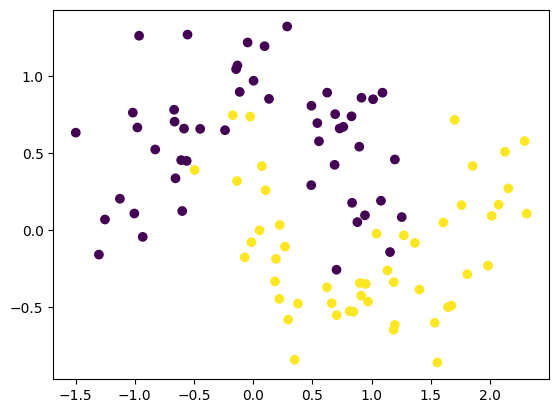

In [20]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [21]:
model=Sequential()

In [22]:
model.add(Dense(128,input_dim=2,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
adam=Adam(learning_rate=0.01)
model.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])
history=model.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

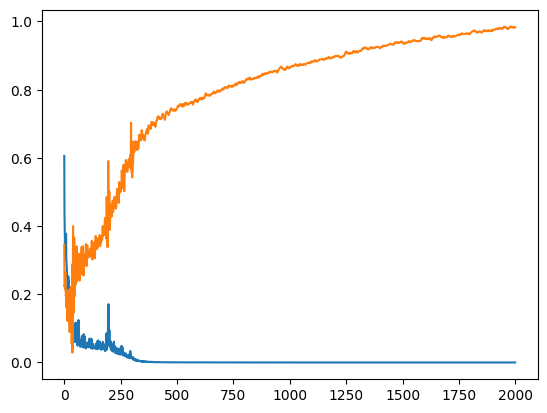

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

from above plot we can infrence that the model is overfit..

In [25]:
model1=Sequential()


In [26]:
model1.add(Dense(128,input_dim=2,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model1.add(Dense(128,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model1.add(Dense(1,activation="sigmoid"))
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
adam=Adam(learning_rate=0.01)
model1.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])
history1=model1.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

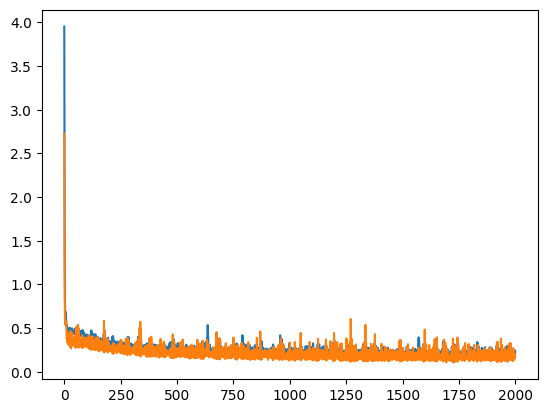

In [28]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [29]:
model_weight_layer1=model.get_weights()[0].reshape(256)
model1_weight_layer1=model1.get_weights()[0].reshape(256)

<Axes: >

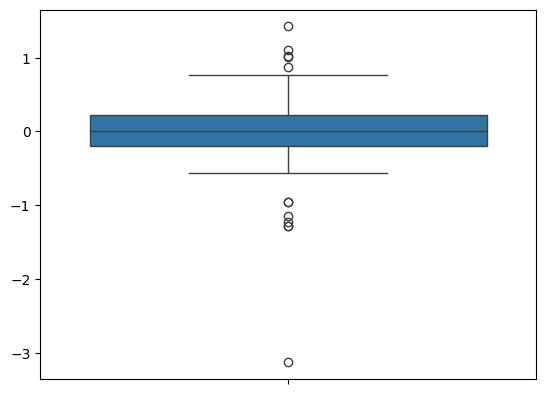

In [31]:
import seaborn as sns
sns.boxplot(model_weight_layer1)

<Axes: >

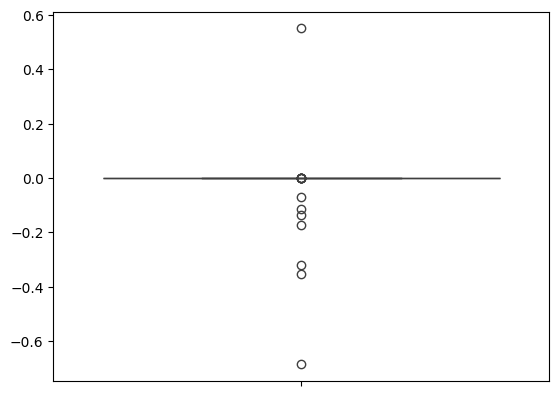

In [32]:
sns.boxplot(model1_weight_layer1)